# **Composants Clés :**
Représentation et Dynamique du Labyrinthe :
La classe Maze définit l'environnement, y compris la grille, où 0 représente un chemin libre et 1 représente un mur. Elle gère les transitions d'état et les retours de récompense basés sur les actions prises.
# **Définition des Actions :**
Les actions sont définies comme des mouvements dans une grille : Droite, Bas, Gauche, Haut.
Transition d'État et Récompenses :
La fonction step() dans la classe Maze calcule l'état suivant en fonction de l'état actuel et de l'action. Elle gère les conditions de limite et les collisions avec les murs.
# **Rendu du Labyrinthe :**
La fonction render() visualise le labyrinthe, le chemin pris par l'agent, et distingue les murs, le départ, et l'arrivée.
# **Implémentation de la Stratégie ε-Greedy :**
Exploration et Exploitation :
L'approche ε-greedy est utilisée pour décider si explorer (prendre une action aléatoire) ou exploiter (prendre la meilleure action connue). Ceci est contrôlé par le paramètre epsilon.
Si un nombre aléatoire est inférieur à epsilon, l'agent explore en sélectionnant une action au hasard.
Sinon, il exploite en choisissant l'action qui a la plus haute valeur Q pour l'état actuel (meilleure action connue).

<ipython-input-22-86412333d964>:39: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "yo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x + 0.5, y + 0.5, 'yo', markersize=10, marker='o')  # Centered yellow dots


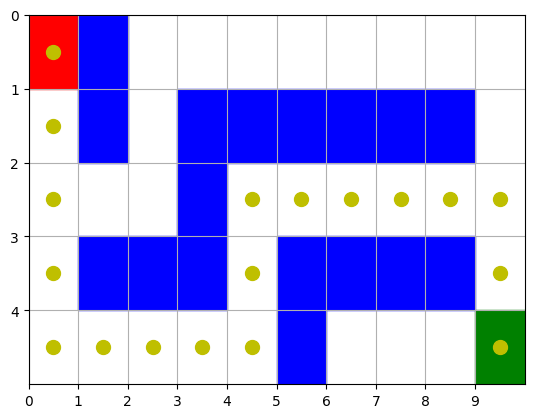

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class Maze:
    def __init__(self, grid, start, goal, wall_penalty=-10, step_penalty=-1, goal_reward=100):
        self.grid = np.array(grid)
        self.start = start
        self.goal = goal
        self.wall_penalty = wall_penalty
        self.step_penalty = step_penalty
        self.goal_reward = goal_reward
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up

    def step(self, state, action):
        next_state = tuple(np.array(state) + np.array(action))
        if (next_state[0] < 0 or next_state[0] >= self.grid.shape[0] or
            next_state[1] < 0 or next_state[1] >= self.grid.shape[1] or
            self.grid[next_state] == 1):  # Wall check
            return state, self.wall_penalty, False
        elif next_state == self.goal:
            return next_state, self.goal_reward, True
        else:
            return next_state, self.step_penalty, False

    def render(self, path):
        fig, ax = plt.subplots()
        # Set up the grid for visualization
        for y in range(self.grid.shape[0]):
            for x in range(self.grid.shape[1]):
                if self.grid[y, x] == 1:  # Wall
                    ax.add_patch(patches.Rectangle((x, y), 1, 1, color='blue'))
                if (y, x) == self.start:  # Start
                    ax.add_patch(patches.Rectangle((x, y), 1, 1, color='red'))
                if (y, x) == self.goal:  # Goal
                    ax.add_patch(patches.Rectangle((x, y), 1, 1, color='green'))
        # Draw path with small dots
        for (y, x) in path:
            ax.plot(x + 0.5, y + 0.5, 'yo', markersize=10, marker='o')  # Centered yellow dots

        plt.xlim(0, self.grid.shape[1])
        plt.ylim(0, self.grid.shape[0])
        plt.gca().invert_yaxis()
        plt.grid(True)
        plt.xticks(np.arange(0, self.grid.shape[1], 1))
        plt.yticks(np.arange(0, self.grid.shape[0], 1))
        plt.show()
    def render1(self, path, title, num_cycles):
        fig, ax = plt.subplots()
        for y in range(self.grid.shape[0]):
            for x in range(self.grid.shape[1]):
                if self.grid[y, x] == 1:
                    ax.add_patch(patches.Rectangle((x, y), 1, 1, color='blue'))
                elif (y, x) == self.start:
                    ax.add_patch(patches.Rectangle((x, y), 1, 1, color='red'))
                elif (y, x) == self.goal:
                    ax.add_patch(patches.Rectangle((x, y), 1, 1, color='green'))
        for (y, x) in path:
            ax.plot(x + 0.5, y + 0.5, 'yo', markersize=10)
        ax.set_xlim(0, self.grid.shape[1])
        ax.set_ylim(0, self.grid.shape[0])
        ax.set_title(f'{title} - Cycles: {num_cycles}')
        plt.gca().invert_yaxis()
        plt.grid(True)
        plt.show()

def q_learning(maze, episodes, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros(maze.grid.shape + (4,))
    for episode in range(episodes):
        state = maze.start
        done = False
        #Extrait de Code Implémentant ε-Greedy
        while not done:
            if np.random.random() < epsilon:
              # Choix d'une action aléatoire (exploration).
                action = np.random.choice(len(maze.actions))  # Explore
            else:
              # # Exécution de l'action choisie et obtention du nouvel état, récompense, et si le jeu est fini.
                action = np.argmax(Q[state])  # Exploitation
            next_state, reward, done = maze.step(state, maze.actions[action])
            old_value = Q[state][action]
            future_value = np.max(Q[next_state])
            Q[state][action] = old_value + alpha * (reward + gamma * future_value - old_value)      #dans chaque cycle on fait la mise a jour de la table Q
            state = next_state
    return Q

# Define the grid (0: free, 1: wall)
grid = [
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
]
start = (0, 0)
goal = (4, 9)

# Initialize the maze
maze = Maze(grid, start, goal)

# Run Q-learning
Q = q_learning(maze, 1000)

# Extract the optimal path from Q-values
state = start
path = [state]
while state != goal:
    action = np.argmax(Q[state])
    state = tuple(np.array(state) + np.array(maze.actions[action]))
    path.append(state)

# Visualize the path
maze.render(path)


steps_per_episode : Cette liste enregistre le nombre de pas que l'agent a pris pour atteindre l'objectif dans chaque épisode. Cela peut être utile pour analyser la performance de l'agent au fil du temps, comme pour observer si l'agent apprend effectivement à résoudre le labyrinthe avec moins de pas.
2. Retour de Valeurs
Premier code : Retourne non seulement la table Q mise à jour mais aussi la liste steps_per_episode.
Deuxième code : Retourne uniquement la table Q mise à jour.

In [ ]:
def q_learning(maze, episodes, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros(maze.grid.shape + (4,))
    steps_per_episode = []
    for episode in range(episodes):
        state = maze.start
        done = False
        steps = 0
        while not done:
            if np.random.random() < epsilon:
                action = np.random.choice(len(maze.actions))
            else:
                action = np.argmax(Q[state])
            next_state, reward, done = maze.step(state, maze.actions[action])
            old_value = Q[state][action]
            future_value = np.max(Q[next_state])
            Q[state][action] = old_value + alpha * (reward + gamma * future_value - old_value)
            state = next_state
            steps += 1
        steps_per_episode.append(steps)
    return Q, steps_per_episode

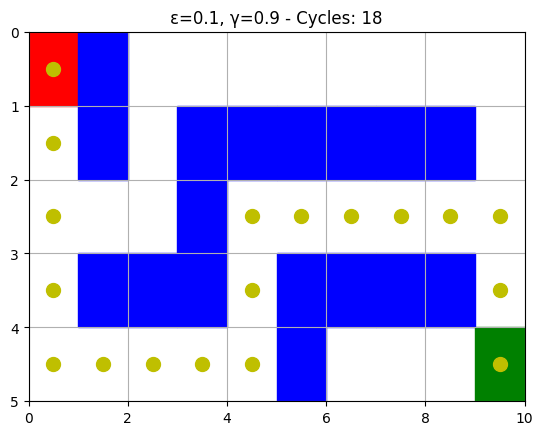

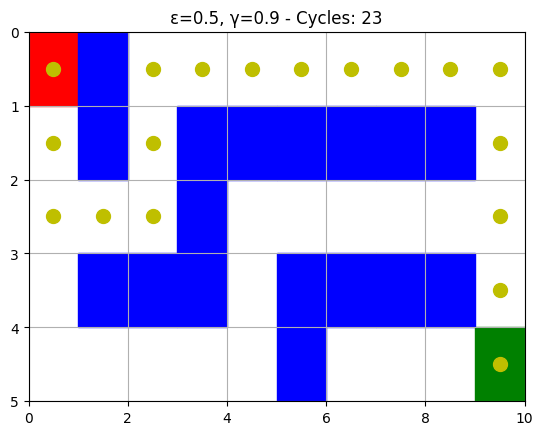

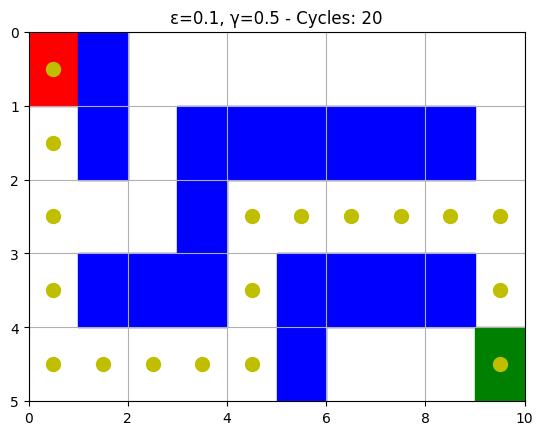

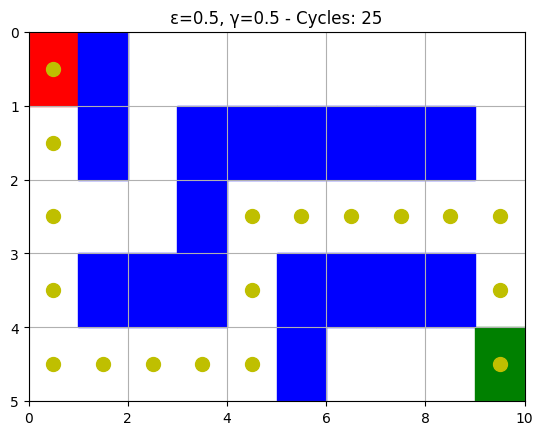

In [ ]:
def extract_path(Q, maze):
    state = maze.start
    path = [state]
    while state != maze.goal:
        action = np.argmax(Q[state])
        state = tuple(np.array(state) + np.array(maze.actions[action]))
        path.append(state)
    return path
# Parameters to test
parameters = [(0.1, 0.9), (0.5, 0.9), (0.1, 0.5), (0.5, 0.5)]
for epsilon, gamma in parameters:
    Q, steps_per_episode = q_learning(maze, 1000, alpha=0.1, gamma=gamma, epsilon=epsilon)
    path = extract_path(Q, maze)
    num_cycles = steps_per_episode[-1]  # Get the number of cycles in the last episode
    maze.render1(path, f'ε={epsilon}, γ={gamma}', num_cycles)


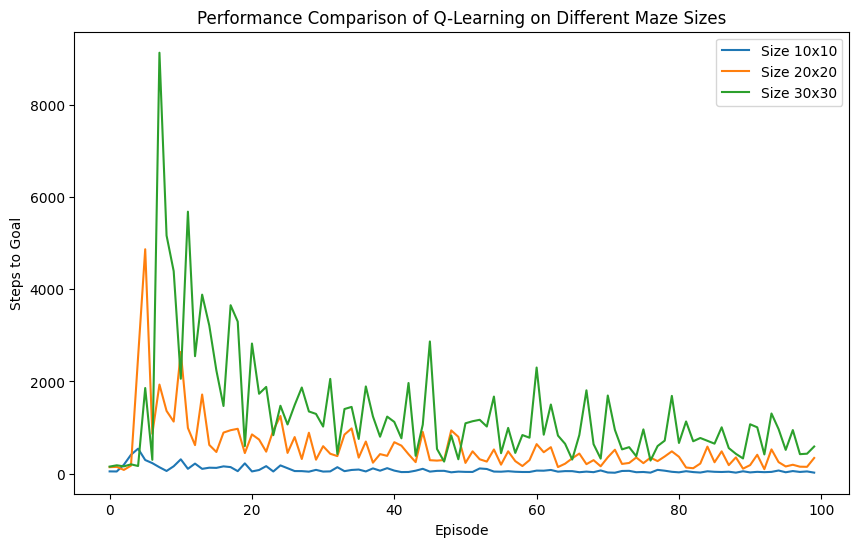

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_random_maze(size, density=0.1):
    grid = np.zeros((size, size), dtype=int)
    start, goal = (0, 0), (size - 1, size - 1)
    obstacles = int(size * size * density)
    while obstacles > 0:
        x, y = random.randint(0, size - 1), random.randint(0, size - 1)
        if (x, y) != start and (x, y) != goal and grid[y, x] == 0:
            grid[y, x] = 1
            obstacles -= 1
    return grid, start, goal

"""Le but principal de la fonction simulate_maze est de tester et d'évaluer l'efficacité de l'algorithme Q-learning dans un environnement de labyrinthe, où l'objectif est de naviguer d'un point de départ
à un point d'arrivée.
Cette fonction permet de mesurer combien de pas l'agent (le simulateur du labyrinthe)
prend pour atteindre l'objectif à travers différents épisodes, en utilisant divers paramètres de l'algorithme Q-learning."""

def simulate_maze(size, density=0.1, episodes=100, alpha=0.1, gamma=0.9, epsilon=0.1):
    grid, start, goal = generate_random_maze(size, density)
    steps_to_goal = []

    Q = {}
    for episode in range(episodes):
        state = start
        steps = 0
        while state != goal:
            if random.random() < epsilon:
                action = random.choice([(0, 1), (1, 0), (0, -1), (-1, 0)])
            else:
                action = max([(0, 1), (1, 0), (0, -1), (-1, 0)], key=lambda a: Q.get((state, a), 0))
            next_state = (state[0] + action[0], state[1] + action[1])
            if next_state == goal:
                reward, done = 100, True
            elif not (0 <= next_state[0] < size and 0 <= next_state[1] < size) or grid[next_state] == 1:
                reward, done = -10, False
                next_state = state
            else:
                reward, done = -1, False
            q_key = (state, action)
            old_value = Q.get(q_key, 0)
            future_value = max([Q.get((next_state, a), 0) for a in [(0, 1), (1, 0), (0, -1), (-1, 0)]])
            Q[q_key] = old_value + alpha * (reward + gamma * future_value - old_value)
            state = next_state
            steps += 1
            if done:
                break
        steps_to_goal.append(steps)

    return steps_to_goal

# Simulation parameters
sizes = [10, 20, 30]
results = {}

for size in sizes:
    results[size] = simulate_maze(size)

# Plotting the results
plt.figure(figsize=(10, 6))
for size, steps in results.items():
    plt.plot(steps, label=f'Size {size}x{size}')
plt.xlabel('Episode')
plt.ylabel('Steps to Goal')
plt.title('Performance Comparison of Q-Learning on Different Maze Sizes')
plt.legend()
plt.show()


**Ce qui différencie principalement ce code des autres implémentations typiques est l'intégration de la visualisation en temps réel des mouvements de l'agent dans le labyrinthe. Cela est particulièrement utile pour le débogage, la démonstration, ou l'enseignement, car il permet de visualiser étape par étape comment l'algorithme Q-learning explore et apprend à naviguer dans l'environnement.**

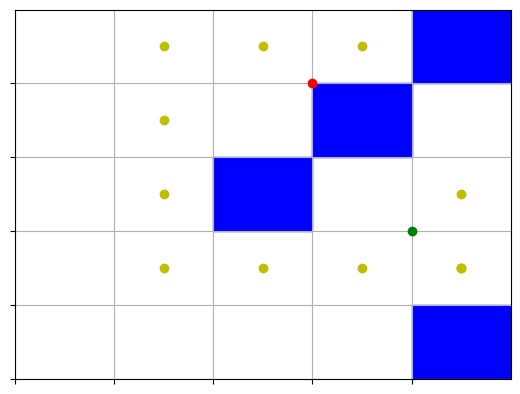

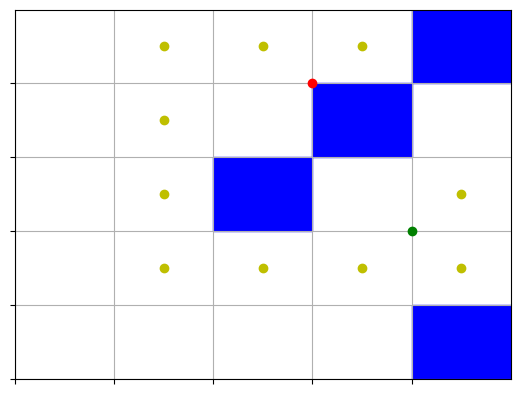

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import display, clear_output
import time
import random

class Maze:
    def __init__(self, grid_size, wall_density=0.2, wall_penalty=-10, step_penalty=-1, goal_reward=100):
        self.grid_size = grid_size
        self.wall_density = wall_density
        self.wall_penalty = wall_penalty
        self.step_penalty = step_penalty
        self.goal_reward = goal_reward
        self.grid = self.initialize_grid(grid_size, wall_density)
        self.start, self.goal = self.random_positions()
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up

    def initialize_grid(self, grid_size, wall_density):
        return np.random.choice([0, 1], size=grid_size, p=[1-wall_density, wall_density])

    def random_positions(self):
        empty_cells = np.argwhere(self.grid == 0)
        start_idx, goal_idx = np.random.choice(len(empty_cells), 2, replace=False)
        return tuple(empty_cells[start_idx]), tuple(empty_cells[goal_idx])

    def step(self, state, action):
        next_state = tuple(np.array(state) + np.array(action))
        if (next_state[0] < 0 or next_state[0] >= self.grid_size[0] or
            next_state[1] < 0 or next_state[1] >= self.grid_size[1] or
            self.grid[next_state] == 1):
            return state, self.wall_penalty, False
        elif next_state == self.goal:
            return next_state, self.goal_reward, True
        else:
            return next_state, self.step_penalty, False

    def render(self, path, interactive=False):
        if interactive:
            clear_output(wait=True)
        fig, ax = plt.subplots()
        for y in range(self.grid_size[0]):
            for x in range(self.grid_size[1]):
                if self.grid[y, x] == 1:  # Draw walls in blue
                    ax.add_patch(patches.Rectangle((x, y), 1, 1, color='blue'))
        # Draw the start and goal positions
        ax.plot(*self.goal[::-1], 'ro')  # Goal in red
        ax.plot(*self.start[::-1], 'go')  # Start in green
        # Draw the path
        for (y, x) in path:
            ax.plot(x + 0.5, y + 0.5, 'yo')  # Path in yellow
        plt.xlim(0, self.grid_size[1])
        plt.ylim(0, self.grid_size[0])
        ax.set_xticks(np.arange(0, self.grid_size[1], 1))
        ax.set_yticks(np.arange(0, self.grid_size[0], 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.grid(True)
        plt.show()
        if interactive:
            time.sleep(0.1)
def real_time_q_learning(maze, episodes, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros(maze.grid.shape + (4,))
    for episode in range(episodes):
        state = maze.start
        path = [state]
        done = False
        """Dans cette fonction, chaque fois que l'agent prend une action et met à jour son état, la méthode render est appelée pour visualiser l'état actuel
         du labyrinthe et le chemin parcouru par l'agent jusqu'à ce point. Cela permet de voir comment l'agent se déplace dans le labyrinthe, quels chemins il prend,
         et comment il réagit aux récompenses et aux pénalités."""
        while not done:
            if np.random.random() < epsilon:
                action = np.random.choice(len(maze.actions))
            else:
                action = np.argmax(Q[state])
            next_state, reward, done = maze.step(state, maze.actions[action])
            old_value = Q[state][action]
            future_value = np.max(Q[next_state])
            Q[state][action] = old_value + alpha * (reward + gamma * future_value - old_value)
            state = next_state
            path.append(state)
            maze.render(path, interactive=True)
    return Q

def extract_optimal_path(maze, Q):
    state = maze.start
    optimal_path = [state]
    while state != maze.goal:
        action = np.argmax(Q[state])
        state = tuple(np.array(state) + np.array(maze.actions[action]))
        optimal_path.append(state)
        if state == maze.goal:
            break
    return optimal_path

# Set the grid size
grid_size = (5, 5)  # You can specify any size
wall_density = 0.1  # You can also ask the user to specify this

# Initialize the maze
maze = Maze(grid_size, wall_density)

# Run Q-learning and visualize in real time
Q = real_time_q_learning(maze, 100)  # You can adjust the number of episodes

# Extract and render the optimal path
optimal_path = extract_optimal_path(maze, Q)
maze.render(optimal_path)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Maze:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up

    def is_valid(self, state):
        x, y = state
        if 0 <= x < self.grid.shape[0] and 0 <= y < self.grid.shape[1]:
            return self.grid[y, x] == 0
        return False

    def step(self, state, action):
        next_state = tuple(np.array(state) + np.array(action))
        if next_state == self.goal:
            return next_state, 100, True  # Goal reached
        if not self.is_valid(next_state):
            return state, -10, False  # Hit wall or out of bounds
        return next_state, -1, False  # Free space

    def render(self, path):
        fig, ax = plt.subplots()
        ax.imshow(self.grid, cmap='Greys', interpolation='nearest')
        for point in path:
            ax.plot(point[1], point[0], 'yo')  # y is row index, x is column index
        ax.plot(self.start[1], self.start[0], 'rs')  # Start in red
        ax.plot(self.goal[1], self.goal[0], 'gs')  # Goal in green
        plt.show()

def generate_random_maze(size, density=0.1):
    grid = np.zeros((size, size), dtype=int)
    start, goal = (0, 0), (size-1, size-1)
    obstacles = int(size * size * density)
    while obstacles > 0:
        x, y = random.randint(0, size-1), random.randint(0, size-1)
        if (x, y) != start and (x, y) != goal and grid[y, x] == 0:
            grid[y, x] = 1
            obstacles -= 1
    return grid, start, goal

def q_learning(maze, episodes, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = {}
    for episode in range(episodes):
        state = maze.start
        while state != maze.goal:
            action = random.choice(maze.actions) if random.random() < epsilon else max(maze.actions, key=lambda x: Q.get((state, x), 0))
            next_state, reward, done = maze.step(state, action)
            old_value = Q.get((state, action), 0)
            future_value = max([Q.get((next_state, a), 0) for a in maze.actions])
            Q[(state, action)] = old_value + alpha * (reward + gamma * future_value - old_value)
            if done:
                break
            state = next_state
    return Q

def extract_path(Q, maze):
    state = maze.start
    path = [state]
    while state != maze.goal:
        state = max([(state[0]+a[0], state[1]+a[1]) for a in maze.actions], key=lambda x: Q.get((state, x), 0))
        path.append(state)
    return path

size = 20  # Smaller sizes for demonstration, change to 20 or 30 for actual runs
grid, start, goal = generate_random_maze(size, 0.1)
maze = Maze(grid, start, goal)
Q = q_learning(maze, 100)
path = extract_path(Q, maze)
maze.render(path)
